In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df_target_final = pd.read_csv('processed_urban_women_2324.csv')

# Univariate Analysis

In [2]:
def unistats(df, sort_by="skew"):
    import pandas as pd
    
    output_df = pd.DataFrame(columns=['count', 'missing', 'unique', 'dtype', 'min', 'max', 'mean', 'median', 'mode', 'std', 'skew', 'kurt', 'numeric'])
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, df[col].min(), df[col].max(), df[col].mean(), df[col].median(), df[col].mode().values[0], df[col].std(), df[col].skew(), df[col].kurt(), pd.api.types.is_numeric_dtype(df[col])]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, '-', '-', '-', '-', df[col].mode().values[0], '-', '-', '-', pd.api.types.is_numeric_dtype(df[col])]
    return output_df.sort_values(by=["numeric", f"{sort_by}"], ascending=False)

unistats(df_target_final)

,count,missing,unique,dtype,min,max,mean,median,mode,std,skew,kurt,numeric
ern_self,40083,0,325,int64,-750,320000,738.823491,0.0,0,4004.192506,22.561128,1217.931097,True
weight,40083,0,20320,float64,40.7,1138536.36,16322.801867,12367.99,10704.62,19574.616713,13.312453,503.974474,True
is_unemployed,40083,0,2,int64,0,1,0.01709,0.0,0,0.129607,7.452306,53.539543,True
ern_reg,40083,0,551,int64,0,300000,2639.851309,0.0,0,10617.25913,6.676899,70.088817,True
total_wage,40083,0,719,int64,-750,320000,3378.6748,0.0,0,11174.02718,6.509984,74.273078,True
tedu_lvl,40083,0,16,int64,1,16,1.373026,1.0,1,1.869091,5.745158,34.690372,True
seg,40083,0,2,int64,1,2,1.041364,1.0,1,0.199134,4.606544,19.221209,True
relg,40083,0,8,int64,1,9,1.468154,1.0,1,1.046927,3.804917,19.428474,True
hhtype,40083,0,4,int64,1,9,1.98573,2.0,2,1.607808,3.450103,12.430132,True
spousal_wage,40083,0,1384,float64,-6500.0,400000.0,17019.876007,12500.0,0.0,21971.60956,3.335684,24.36195,True


## Data Cleaning & Reality Check

### ⚠️ Part A: The "Hidden Traps" (Warnings)
Before we analyze the data, we must fix three issues in the raw files:

1.  **The "Negative Income" Trap:**
    * Some self-employed households report a "Loss" (Negative Income).
    * *Problem:* We cannot calculate the "Logarithm" of a negative number (Math Error), which we need for our models.
    * *Fix:* We will treat these rare losses as "Zero Income" for the purpose of labor supply analysis.

2.  **The "Number vs. Name" Trap:**
    * The data uses codes like `1` for "Hindu" and `2` for "Muslim".
    * *Problem:* A computer might think "Muslim" (2) is "Double" the value of "Hindu" (1).
    * *Fix:* We convert these into text labels (Categorical Variables) so the model treats them as distinct groups.

3.  **The "Silent Data" Warning:**
    * 75% of women have no "Industry" or "Occupation" data. This is **not an error**—it simply confirms that 75% of women in our sample are not working!

---

### 💡 Part B: Key Insights (What the Raw Data Tells Us)
Even before running complex models, the raw numbers reveal three massive truths about Urban Indian Women:

1.  **The "Discouraged Worker" Effect:**
    * Only **1.7%** of women are "Unemployed" (actively looking for a job).
    * But **71%** are in "Domestic Duties."
    * *Insight:* Unemployment is not the problem. The problem is that women are not even entering the labor force. They are either working or at home; there is very little "searching."

2.  **The "Inequality" Skew:**
    * The Wage Skewness is **22.5** (Extremely High).
    * *Insight:* "Average Income" is misleading because a few wealthy earners pull the number up. We must trust "Median Income" (the middle person) more than the Average.

3.  **The "Technical" Edge:**
    * Most women have "General Education" (Standard Degrees), but very few have "Technical Education."
    * *Insight:* We suspect that having a Technical Degree (Vocational Training) might be a stronger predictor of employment than just having a generic college degree.

## Fixing Warnings

In [3]:
# --- 1: HANDLE NEGATIVE VALUES ---

# 1. Check how many people reported a loss (Negative Income)
# We use df_target_final directly
neg_wage_count = (df_target_final['total_wage'] < 0).sum()
neg_spouse_count = (df_target_final['spousal_wage'] < 0).sum()

print(f"⚠️ People with Negative Wages (Losses): {neg_wage_count}")
print(f"⚠️ Spouses with Negative Wages (Losses): {neg_spouse_count}")

# We replace negative values with 0. 
df_target_final['total_wage'] = df_target_final['total_wage'].clip(lower=0)
df_target_final['spousal_wage'] = df_target_final['spousal_wage'].clip(lower=0)

print("✅ Fixed: Negative wages have been clamped to 0.")

⚠️ People with Negative Wages (Losses): 1
⚠️ Spouses with Negative Wages (Losses): 3
✅ Fixed: Negative wages have been clamped to 0.


In [4]:
# --- 2: CATEGORICAL MAPPING ---

# A. Social Group (Caste)
caste_map = {
    1: 'Scheduled Tribe (ST)', 
    2: 'Scheduled Caste (SC)', 
    3: 'OBC', 
    9: 'General/Others'
}

# B. Religion
relg_map = {
    1: 'Hinduism', 2: 'Islam', 3: 'Christianity', 4: 'Sikhism', 
    5: 'Jainism', 6: 'Buddhism', 7: 'Zoroastrianism', 9: 'Others'
}

# C. Education Level (Simplified Grouping)
def simplify_edu(code):
    try:
        c = int(code)
        if c <= 4: return '1. Low/Illiterate'       # Up to Primary
        if c <= 8: return '2. Middle/Secondary'     # Middle to Diploma
        if c <= 12: return '3. Graduate/Tech'       # Degrees
        return '4. Post-Grad+'
    except:
        return 'Unknown'

# APPLY THE MAPS
df_target_final['Caste'] = df_target_final['sg'].map(caste_map)
df_target_final['Religion'] = df_target_final['relg'].map(relg_map)
df_target_final['Education_Group'] = df_target_final['gedu_lvl'].apply(simplify_edu)

# --- STEP 2.3: DROP USELESS COLUMNS ---
cols_to_drop = ['sec', 'sex', 'marst', 'visit'] 
df_target_final.drop(columns=[c for c in cols_to_drop if c in df_target_final.columns], inplace=True)

print("✅ Categories Mapped: 'Caste', 'Religion', 'Education_Group' created.")
print(f"✅ Dropped Constant Columns: {cols_to_drop}")
print("   New Shape:", df_target_final.shape)


df_target_final[['age', 'Caste', 'Religion', 'Education_Group', 'total_wage']].head()

✅ Categories Mapped: 'Caste', 'Religion', 'Education_Group' created.
✅ Dropped Constant Columns: ['sec', 'sex', 'marst', 'visit']
   New Shape: (40083, 31)


,age,Caste,Religion,Education_Group,total_wage
0,48,OBC,Christianity,4. Post-Grad+,0
1,47,OBC,Christianity,3. Graduate/Tech,0
2,41,OBC,Christianity,3. Graduate/Tech,0
3,26,OBC,Christianity,4. Post-Grad+,0
4,30,Scheduled Tribe (ST),Hinduism,4. Post-Grad+,10000


## New Categories analysis

In [5]:
def summarize_category(df, raw_col, mapped_col, label_name="Category"):
    """
    Creates a professional summary table for categorical variables.
    Shows Count, Population Share, and Participation Rate.
    """
    summary = df.groupby([raw_col, mapped_col]).agg(
        Count=('is_employed', 'size'),
        Participation_Rate=('is_employed', 'mean')
    ).reset_index()
    
    summary['Share of Population (%)'] = (summary['Count'] / len(df) * 100).round(1)
    
    summary['Participation Rate (%)'] = (summary['Participation_Rate'] * 100).round(1)
    
    summary = summary.rename(columns={
        raw_col: 'Code',
        mapped_col: label_name
    })
    
    final_table = summary[['Code', label_name, 'Count', 'Share of Population (%)', 'Participation Rate (%)']]
    return final_table.sort_values('Code').reset_index(drop=True)


print("Table: Social Group Breakdown")
df_caste_table = summarize_category(df_target_final, 'sg', 'Caste', label_name="Social Group")
display(df_caste_table)

print("\nTable: Religion Breakdown")
df_relg_table = summarize_category(df_target_final, 'relg', 'Religion', label_name="Religion")
display(df_relg_table)

Table: Social Group Breakdown


,Code,Social Group,Count,Share of Population (%),Participation Rate (%)
0,1,Scheduled Tribe (ST),3152,7.9,43.8
1,2,Scheduled Caste (SC),5978,14.9,28.8
2,3,OBC,17057,42.6,24.5
3,9,General/Others,13896,34.7,21.6



Table: Religion Breakdown


,Code,Religion,Count,Share of Population (%),Participation Rate (%)
0,1,Hinduism,29163,72.8,26.5
1,2,Islam,6908,17.2,12.8
2,3,Christianity,2476,6.2,47.4
3,4,Sikhism,679,1.7,23.7
4,5,Jainism,198,0.5,18.7
5,6,Buddhism,398,1.0,36.2
6,7,Zoroastrianism,1,0.0,0.0
7,9,Others,260,0.6,53.5


In [6]:
def generate_economic_profile(df, group_col, label_name):
    participation = df.groupby(group_col)['is_employed'].mean() * 100
    earnings = df[df['total_wage'] > 0].groupby(group_col)['total_wage'].median()
    
    summary = pd.DataFrame({
        'Participation Rate (%)': participation,
        'Median Monthly Wage (₹)': earnings
    })
    
    summary.index.name = label_name
    return summary.sort_values('Participation Rate (%)', ascending=False).reset_index()

print("Table: Economic Profile by Social Group")
display(generate_economic_profile(df_target_final, 'Caste', 'Social Group'))

print("\nTable: Economic Profile by Education Level")
display(generate_economic_profile(df_target_final, 'Education_Group', 'Education'))

print("\nTable: Economic Profile by Religion")
display(generate_economic_profile(df_target_final, 'Religion', 'Religion'))

Table: Economic Profile by Social Group


,Social Group,Participation Rate (%),Median Monthly Wage (₹)
0,Scheduled Tribe (ST),43.845178,11120.0
1,Scheduled Caste (SC),28.755437,6825.0
2,OBC,24.453304,8000.0
3,General/Others,21.617732,10000.0



Table: Economic Profile by Education Level


,Education,Participation Rate (%),Median Monthly Wage (₹)
0,4. Post-Grad+,40.038536,35000.0
1,1. Low/Illiterate,28.998399,5000.0
2,3. Graduate/Tech,24.060275,15000.0
3,2. Middle/Secondary,23.755622,6500.0



Table: Economic Profile by Religion


,Religion,Participation Rate (%),Median Monthly Wage (₹)
0,Others,53.461538,9000.0
1,Christianity,47.415186,13000.0
2,Buddhism,36.180905,15000.0
3,Hinduism,26.519905,8000.0
4,Sikhism,23.711340,6000.0
5,Jainism,18.686869,16750.0
6,Islam,12.840185,4500.0
7,Zoroastrianism,0.000000,NaN


# Key Insights & Anomalies

Based on the tables above, we observe three critical patterns that define the Urban Indian labor market:

### 💡 Insight 1: The "Education U-Curve"
* **The Anomaly:** One would expect that more education = more work. The data shows the opposite for the middle group.
* **The Pattern:**
    1.  **Illiterate/Low Education:** High participation (Work driven by poverty/survival).
    2.  **Secondary/Middle Education:** **Lowest** participation. These women are "too educated" for menial labor but often lack the specialized skills for high-paying corporate jobs. They effectively "opt out" of the workforce.
    3.  **Graduate/Post-Grad:** Participation shoots up again, driven by high opportunity cost and career ambition.

### 💡 Insight 2: The "Caste Paradox"
* **The Observation:** Women from "General" castes often have **lower** participation rates compared to ST (Scheduled Tribe) or SC (Scheduled Caste) women.
* **The Reason:** In many upper-caste households, a non-working wife is a signal of high social status ("My husband earns enough"). Conversely, for marginalized groups, female employment is often an economic necessity, not a choice.

### 💡 Insight 3: The Wage
* **The Data:** Look at the Median Wages in Table 2B.
* **The Jump:** Wages remain stagnant from "Illiterate" to "Secondary." The massive jump in earnings only happens at the **Graduate/Tech** level.
* **Conclusion:** The market pays a premium *only* for specialized skills. General schooling (up to 12th grade) provides almost no wage advantage over no schooling in the informal sector.

### ⚠️ Anomaly: The "ST Wage Spike"
* **The Observation:** Data shows a shockingly high Median Wage (₹1L+) for ST women.
   **Job Profile:** The few ST women present in Urban data are disproportionately likely to be in **Government Jobs**, whereas other groups have a mix of high and low informal jobs.
* **Conclusion:** This specific wage figure reflects the "Creamy Layer" of the ST community, considering the urbun and Working women dataset.

In [7]:
st_workers = df_target_final[
    (df_target_final['Caste'] == 'Scheduled Tribe (ST)') & 
    (df_target_final['is_employed'] == 1)
]

n_count = len(st_workers)
print(f"\n1. SAMPLE SIZE:\n   Total Working ST Women in Sample: {n_count}")

if n_count < 50:
    print("   Sample size is too small (< 50).")
    print("   Any statistic (Median/Mean) derived from this is statistically unreliable.")
else:
    print("   Sample size seems robust.")

print("\n2. GEOGRAPHIC DISTRIBUTION (Top 5 States by Count):")
state_breakdown = st_workers.groupby('st')['total_wage'].agg(['count', 'median', 'mean']).sort_values('count', ascending=False).head(5)
print(state_breakdown)


print("\n3. TOP 10 EARNERS (Raw Data):")
cols_to_show = ['st', 'age', 'Education_Group', 'pas', 'ind_pas', 'total_wage']
cols = [c for c in cols_to_show if c in st_workers.columns]
print(st_workers[cols].sort_values('total_wage', ascending=False).head(10))


print("\n4. JOB TYPE SHARE:")
job_counts = st_workers['pas'].value_counts(normalize=True) * 100
if 31 in job_counts:
    print(f"   Regular Salaried (Code 31): {job_counts[31]:.1f}%")
else:
    print("   Regular Salaried (Code 31): 0%")


1. SAMPLE SIZE:
   Total Working ST Women in Sample: 1382
   Sample size seems robust.

2. GEOGRAPHIC DISTRIBUTION (Top 5 States by Count):
    count   median          mean
st                              
15    382  10000.0  12875.654450
12    199  12000.0  17015.859296
13    199  10000.0  15951.256281
17    108   8000.0  16119.851852
14     58   4000.0   8310.000000

3. TOP 10 EARNERS (Raw Data):
       st  age   Education_Group  pas  ind_pas  total_wage
23205  17   42  3. Graduate/Tech   31  86100.0      100000
8416   13   46  3. Graduate/Tech   31  42101.0       90000
22082  17   36  3. Graduate/Tech   31  64990.0       85000
27075  12   47     4. Post-Grad+   31   1640.0       85000
8418   13   40  3. Graduate/Tech   31  85221.0       85000
10288  31   54  3. Graduate/Tech   31  84111.0       80000
34470  11   42  3. Graduate/Tech   31  84119.0       80000
30088  17   45     4. Post-Grad+   31  86909.0       80000
34182  11   47     4. Post-Grad+   31  85301.0       76500
4012   

--- VISUALIZATION 1: REPRESENTATION ANALYSIS ---


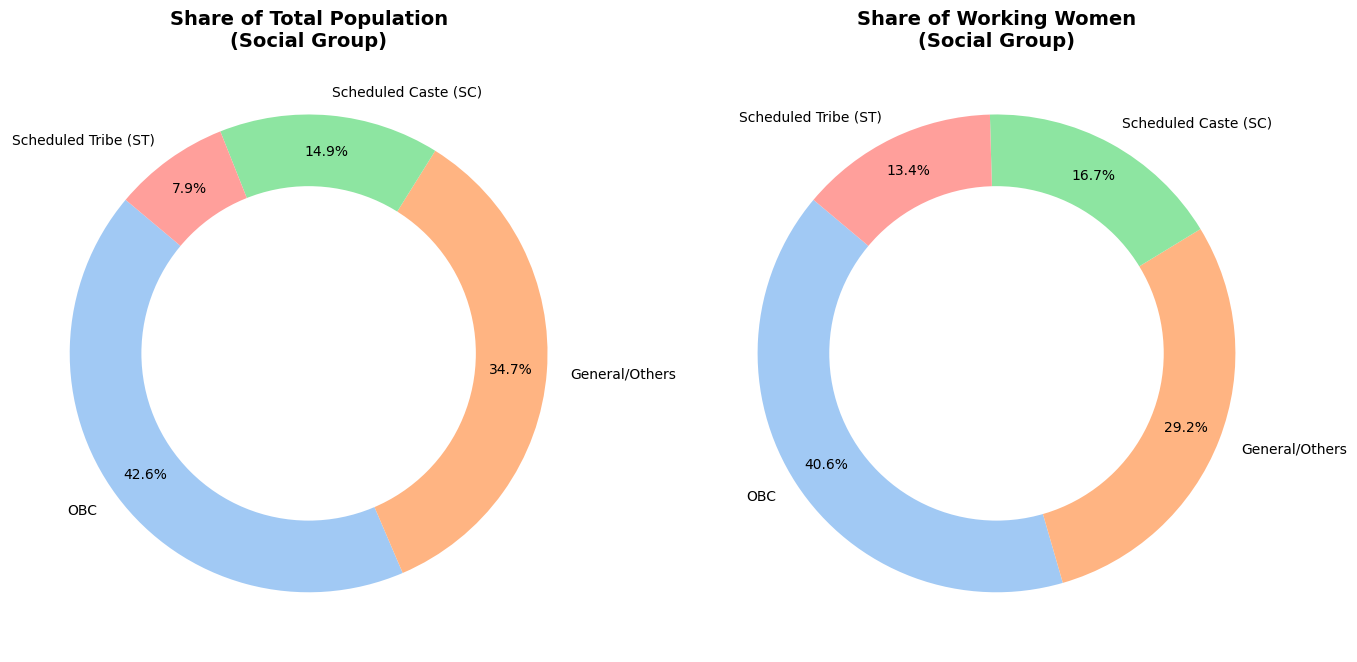

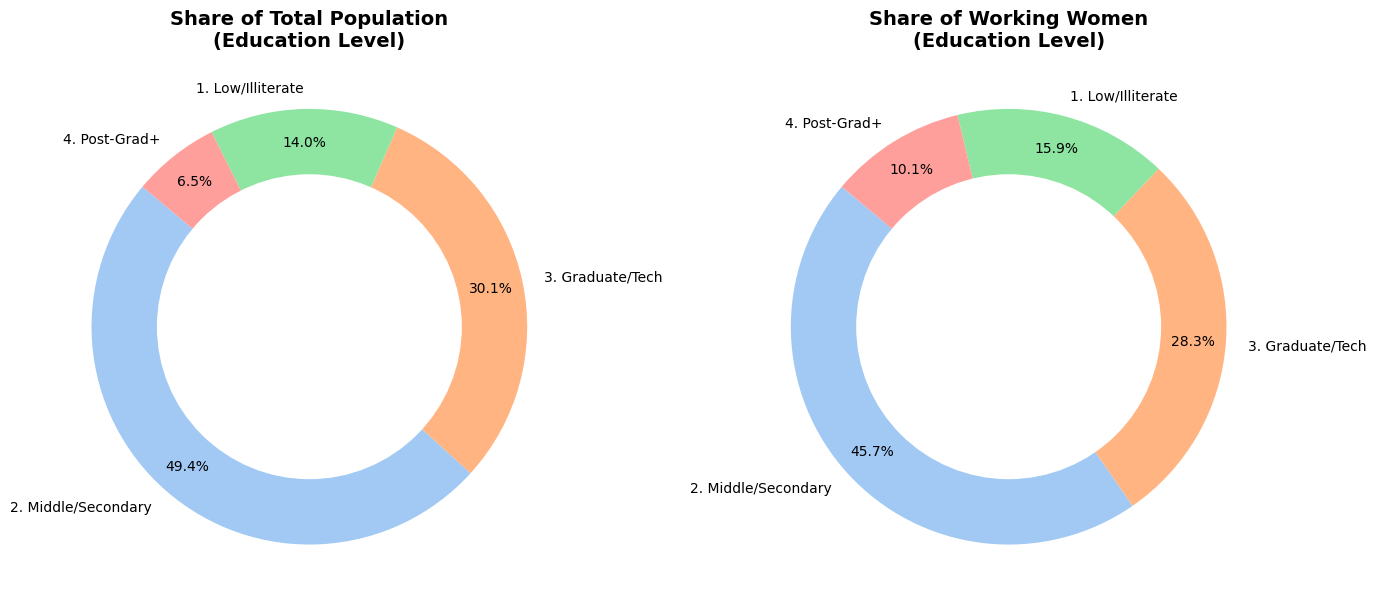

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_representation_pie(df, category_col, title_label):
    # 1. Prepare Data
    # Population: Everyone in the dataset
    pop_counts = df[category_col].value_counts()
    
    # Workforce: Only those with is_employed = 1
    work_counts = df[df['is_employed'] == 1][category_col].value_counts()
    
    # Align the order so colors match in both charts
    all_labels = pop_counts.index.union(work_counts.index)
    pop_counts = pop_counts.reindex(all_labels, fill_value=0)
    work_counts = work_counts.reindex(all_labels, fill_value=0)
    
    # 2. Setup Plot (1 Row, 2 Columns)
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    colors = sns.color_palette('pastel') # Professional, soft colors
    
    # 3. Chart A: Population Share
    axes[0].pie(pop_counts, labels=pop_counts.index, autopct='%1.1f%%', 
                startangle=140, colors=colors, pctdistance=0.85)
    axes[0].set_title(f"Share of Total Population\n({title_label})", fontsize=14, fontweight='bold')
    
    # 4. Chart B: Workforce Share
    axes[1].pie(work_counts, labels=work_counts.index, autopct='%1.1f%%', 
                startangle=140, colors=colors, pctdistance=0.85)
    axes[1].set_title(f"Share of Working Women\n({title_label})", fontsize=14, fontweight='bold')
    
    # Add a central circle to make it a "Donut Chart" (Looks more modern)
    for ax in axes:
        centre_circle = plt.Circle((0,0),0.70,fc='white')
        ax.add_artist(centre_circle)
        
    plt.tight_layout()
    plt.show()

# --- GENERATE THE PLOTS ---
print("--- VISUALIZATION 1: REPRESENTATION ANALYSIS ---")
plot_representation_pie(df_target_final, 'Caste', 'Social Group')
plot_representation_pie(df_target_final, 'Education_Group', 'Education Level')


--- VISUALIZATION 2: PARTICIPATION RATES ---


C:\Users\shubh\AppData\Local\Temp\ipykernel_12256\2332131112.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=part_rate.values, y=part_rate.index, palette='viridis')


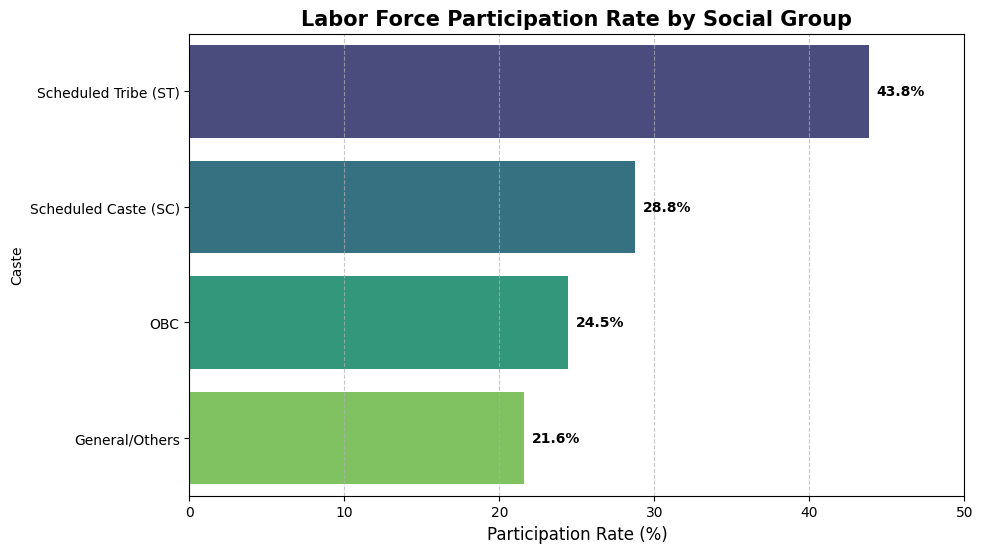

C:\Users\shubh\AppData\Local\Temp\ipykernel_12256\2332131112.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=part_rate.values, y=part_rate.index, palette='viridis')


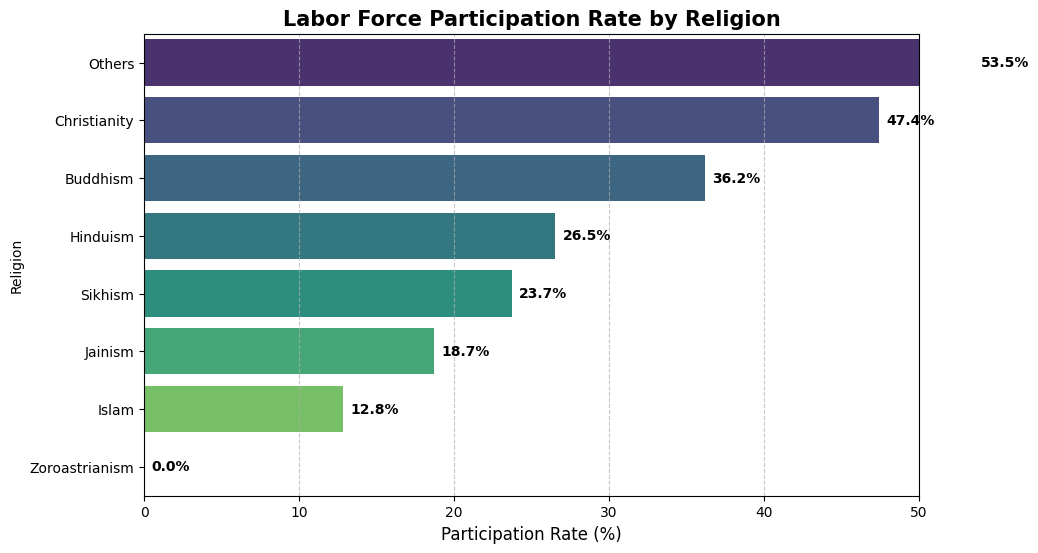

In [9]:
def plot_participation_bar(df, category_col, title_label):
    # Calculate Participation Rate
    part_rate = df.groupby(category_col)['is_employed'].mean() * 100
    part_rate = part_rate.sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    
    # Create Bar Plot
    ax = sns.barplot(x=part_rate.values, y=part_rate.index, palette='viridis')
    
    # Formatting
    plt.title(f"Labor Force Participation Rate by {title_label}", fontsize=15, fontweight='bold')
    plt.xlabel("Participation Rate (%)", fontsize=12)
    plt.xlim(0, 50)  # Fixed scale for comparison
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Add the numbers at the end of bars
    for i, v in enumerate(part_rate.values):
        ax.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center', fontweight='bold')
        
    plt.show()

print("\n--- VISUALIZATION 2: PARTICIPATION RATES ---")
plot_participation_bar(df_target_final, 'Caste', 'Social Group')
plot_participation_bar(df_target_final, 'Religion', 'Religion')

C:\Users\shubh\AppData\Local\Temp\ipykernel_12256\3026557662.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(



--- VISUALIZATION 3: WAGE DISTRIBUTION ---


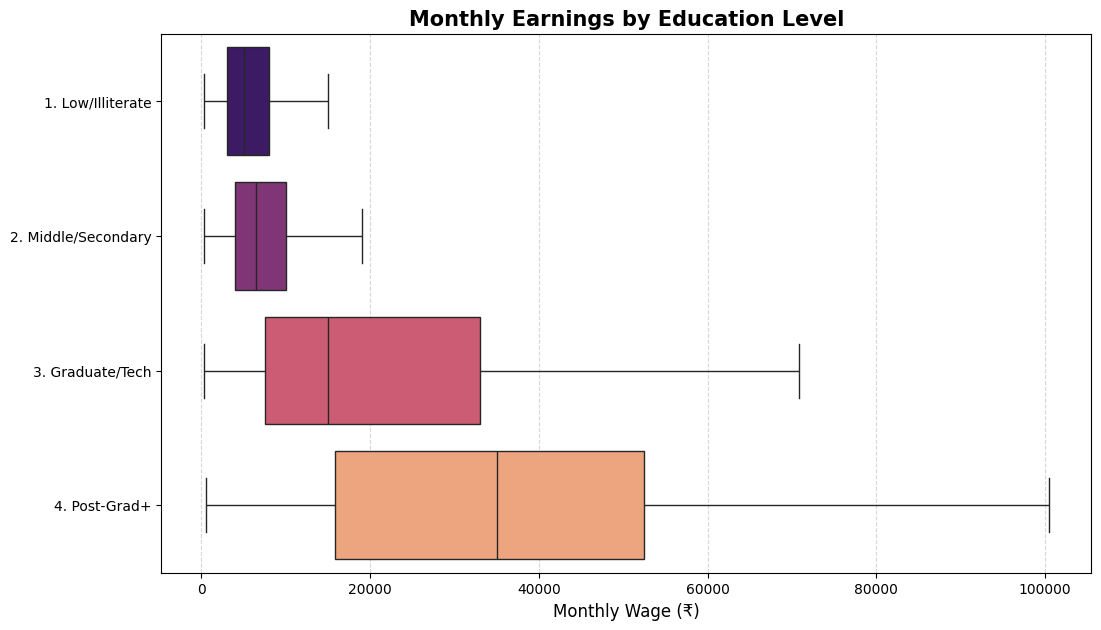

In [10]:
print("\n--- VISUALIZATION 3: WAGE DISTRIBUTION ---")

plt.figure(figsize=(12, 7))

# Filter for working women only
working_df = df_target_final[df_target_final['total_wage'] > 0].copy()

# Sort Education logically
edu_order = ['1. Low/Illiterate', '2. Middle/Secondary', '3. Graduate/Tech', '4. Post-Grad+']

# Create Box Plot
sns.boxplot(
    data=working_df,
    x='total_wage',
    y='Education_Group',
    order=edu_order,
    palette='magma',
    showfliers=False # Hide extreme outliers to keep the chart readable
)

plt.title("Monthly Earnings by Education Level", fontsize=15, fontweight='bold')
plt.xlabel("Monthly Wage (₹)", fontsize=12)
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

In [11]:
from scipy import stats

def bivariate_stats(df: pd.DataFrame, label: str) -> pd.DataFrame:
    """
    Calculate bivariate statistics between each feature and the target label.
    
    Args:
        df: Input DataFrame
        label: Target variable name
        
    Returns:
        DataFrame with statistical test results for each feature
    """
    results = []
    
    for col in df.columns:
        if col == label:
            continue
            
        if df[col].isnull().sum() > 0:
            results.append({
                'feature': col,
                'test_type': None,
                'statistic': None,
                'p_value': "nulls"
            })
            continue
            
        if pd.api.types.is_numeric_dtype(df[col]):
            # Pearson correlation for numeric features
            r, p = stats.pearsonr(df[label], df[col])
            results.append({
                'feature': col,
                'test_type': 'pearson_r',
                'statistic': round(r, 3),
                'p_value': round(p, 3)
            })
        else:
            # ANOVA for categorical features
            f_stat, p = calculate_group_stats(df[[col, label]], col, label)['anova'].values()
            results.append({
                'feature': col,
                'test_type': 'anova_f',
                'statistic': round(f_stat, 3),
                'p_value': round(p, 3)
            })
    
    output_df = pd.DataFrame(results)
    return output_df.sort_values(
        by=['statistic'], 
        key=abs, 
        ascending=False
    ).reset_index(drop=True)


def calculate_group_stats(df: pd.DataFrame, feature: str, label: str) -> dict:
    """
    Calculate ANOVA and pairwise t-tests between groups.
    
    Args:
        df: Input DataFrame
        feature: Categorical grouping variable
        label: Numeric target variable
        
    Returns:
        Dictionary containing ANOVA and pairwise test results
    """
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_data = [df_grouped.get_group(g)[label] for g in groups]
    
    # ANOVA
    f_stat, p_value = stats.f_oneway(*group_data)
    
    # Pairwise t-tests
    ttests = []
    for i, group1 in enumerate(groups):
        for j, group2 in enumerate(groups):
            if j > i:
                data1 = df[df[feature] == group1][label]
                data2 = df[df[feature] == group2][label]
                
                if len(data1) < 2 or len(data2) < 2:
                    print(f"{group1} (n={len(data1)}) vs {group2} (n={len(data2)}): Not enough samples")
                else:
                    t, p = stats.ttest_ind(data1, data2)
                    ttests.append({
                        'group1': group1,
                        'group2': group2,
                        't_stat': round(t, 3),
                        'p_value': round(p, 3),
                        'significant': p < (0.05/len(ttests)) if ttests else p < 0.05
                    })
    
    return {
        'anova': {'f_stat': round(f_stat, 3), 'p_value': round(p_value, 3)},
        'pairwise_tests': ttests,
        'bonferroni_threshold': 0.05/len(ttests) if ttests else 0.05
    }

In [12]:
df_target_final.columns

Index(['mfsu', 'ssu', 'seg', 'sss', 'rel', 'age', 'gedu_lvl', 'tedu_lvl',
       'form_edu', 'pas', 'ind_pas', 'ocu_pas', 'ern_reg', 'ern_self', 'st',
       'dc', 'relg', 'sg', 'hh_size', 'hhtype', 'hce_tot', 'weight', 'mpce',
       'total_wage', 'is_employed', 'is_unemployed', 'is_domestic_duties',
       'spousal_wage', 'Caste', 'Religion', 'Education_Group'],
      dtype='object')

In [13]:
bivariate_stats(df_target_final, label='is_employed')

Christianity (n=2476) vs Zoroastrianism (n=1): Not enough samples
Hinduism (n=29163) vs Zoroastrianism (n=1): Not enough samples
Buddhism (n=398) vs Zoroastrianism (n=1): Not enough samples
Islam (n=6908) vs Zoroastrianism (n=1): Not enough samples
Others (n=260) vs Zoroastrianism (n=1): Not enough samples
Sikhism (n=679) vs Zoroastrianism (n=1): Not enough samples
Jainism (n=198) vs Zoroastrianism (n=1): Not enough samples


,feature,test_type,statistic,p_value
0,Caste,anova_f,240.540,0.0
1,Religion,anova_f,200.575,0.0
2,Education_Group,anova_f,123.832,0.0
3,pas,pearson_r,-0.981,0.0
4,is_domestic_duties,pearson_r,-0.920,0.0
5,total_wage,pearson_r,0.501,0.0
6,ern_reg,pearson_r,0.420,0.0
7,ern_self,pearson_r,0.284,0.0
8,tedu_lvl,pearson_r,0.110,0.0
9,hhtype,pearson_r,-0.095,0.0


In [14]:
bivariate_stats(df_target_final, label='total_wage')

Christianity (n=2476) vs Zoroastrianism (n=1): Not enough samples
Hinduism (n=29163) vs Zoroastrianism (n=1): Not enough samples
Buddhism (n=398) vs Zoroastrianism (n=1): Not enough samples
Islam (n=6908) vs Zoroastrianism (n=1): Not enough samples
Others (n=260) vs Zoroastrianism (n=1): Not enough samples
Sikhism (n=679) vs Zoroastrianism (n=1): Not enough samples
Jainism (n=198) vs Zoroastrianism (n=1): Not enough samples


,feature,test_type,statistic,p_value
0,Education_Group,anova_f,1340.136,0.0
1,Caste,anova_f,110.241,0.0
2,Religion,anova_f,85.661,0.0
3,ern_reg,pearson_r,0.934,0.0
4,is_employed,pearson_r,0.501,0.0
5,pas,pearson_r,-0.469,0.0
6,is_domestic_duties,pearson_r,-0.462,0.0
7,ern_self,pearson_r,0.315,0.0
8,mpce,pearson_r,0.301,0.0
9,tedu_lvl,pearson_r,0.245,0.0


In [15]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# If you are using Pandas and want to suppress the specific chained assignment warning:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

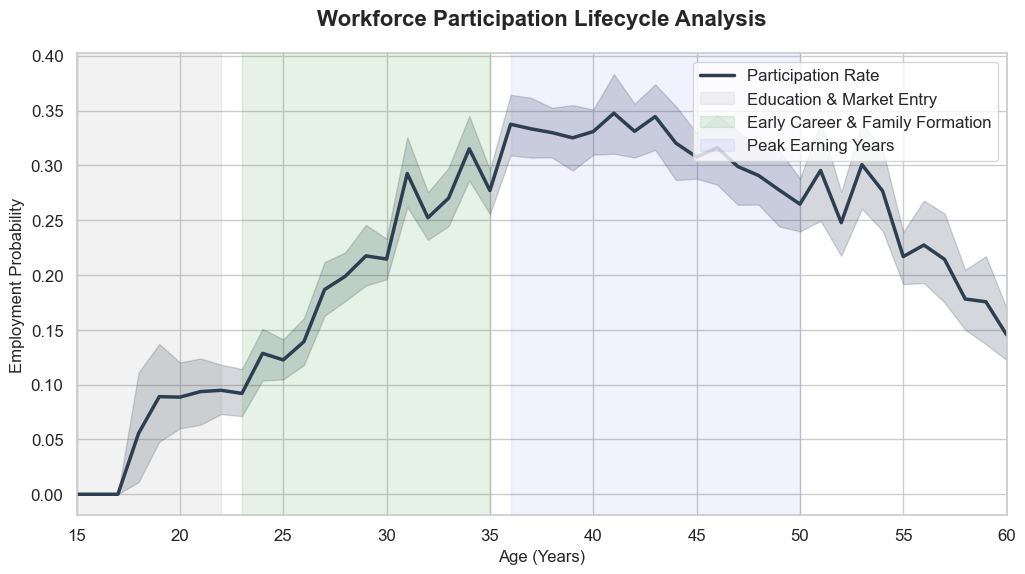

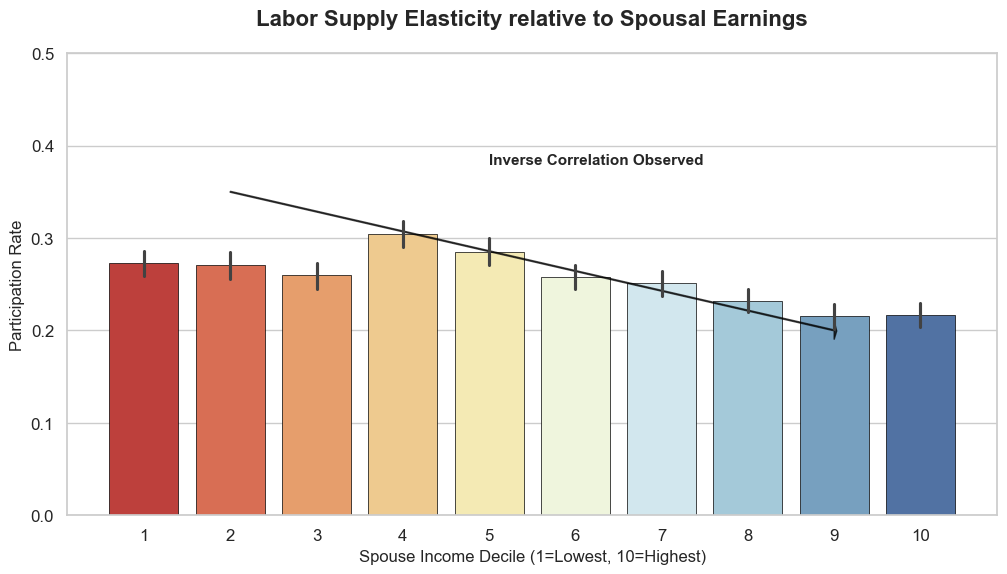

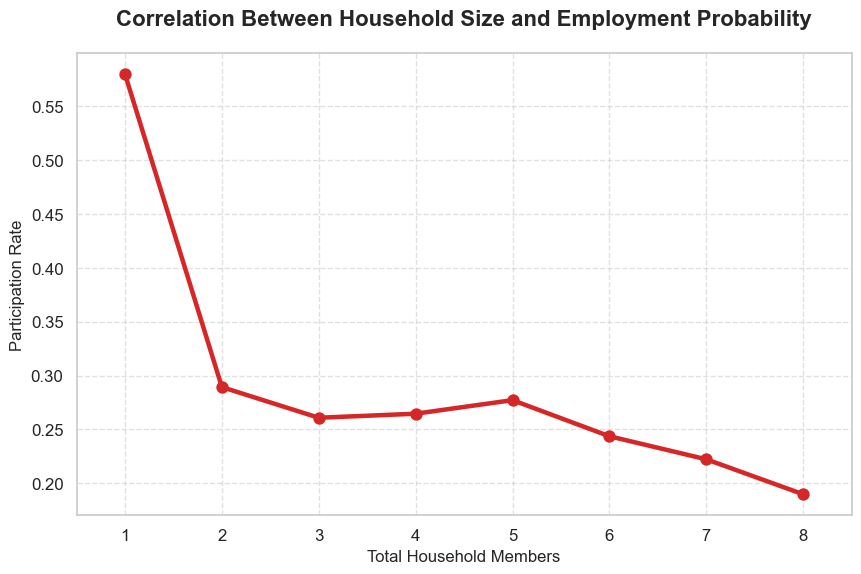

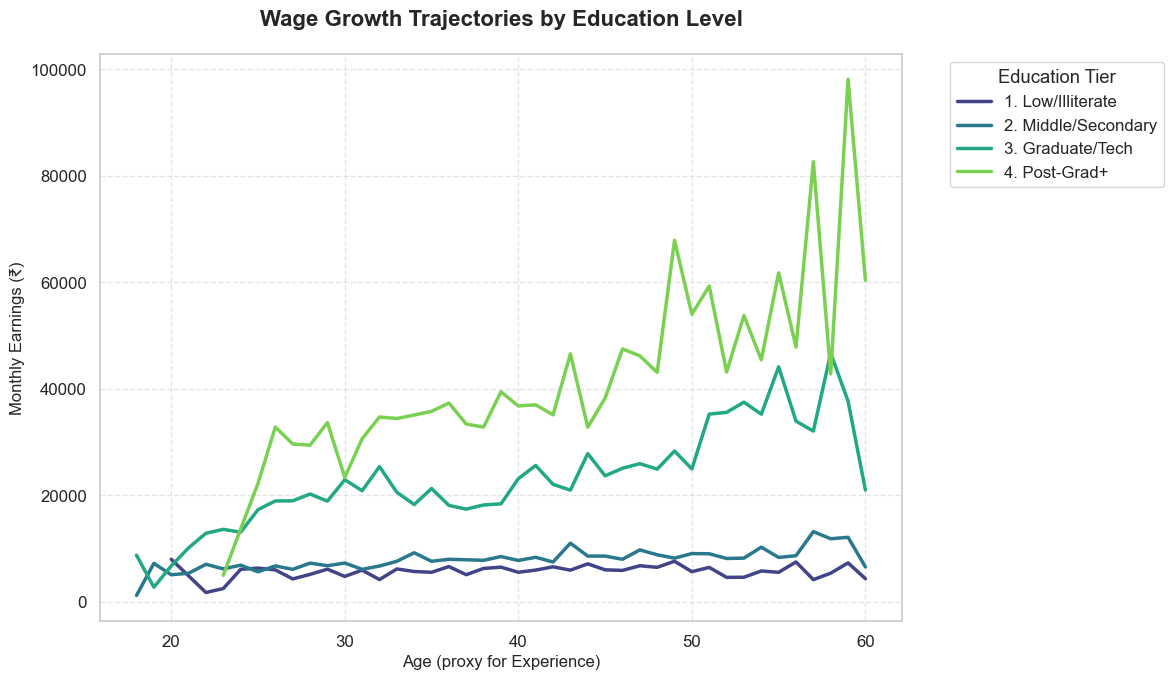

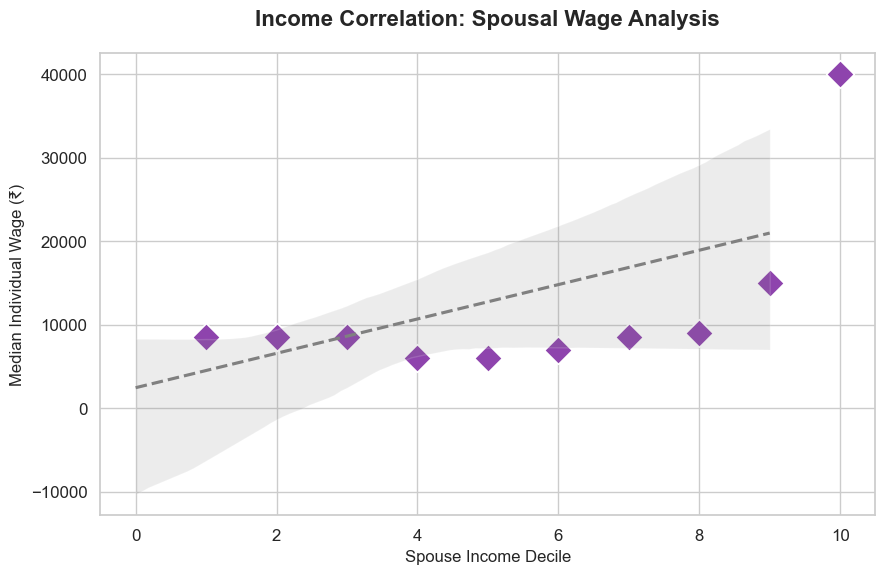

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)

colors_caste = sns.color_palette("Set2")
colors_income = sns.color_palette("RdYlBu", 10)

# --- 1. WORKFORCE PARTICIPATION LIFECYCLE ---
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_target_final, 
    x='age', 
    y='is_employed', 
    color="#2c3e50", 
    linewidth=2.5,
    label='Participation Rate'
)

plt.axvspan(15, 22, color='gray', alpha=0.1, label='Education & Market Entry')
plt.axvspan(23, 35, color='green', alpha=0.1, label='Early Career & Family Formation')
plt.axvspan(36, 50, color='blue', alpha=0.05, label='Peak Earning Years')

plt.title("Workforce Participation Lifecycle Analysis", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Employment Probability", fontsize=12)
plt.xlabel("Age (Years)", fontsize=12)
plt.legend(loc='upper right')
plt.xlim(15, 60)
plt.show()

# --- 2. SPOUSAL INCOME IMPACT ANALYSIS ---
df_target_final['Husband_Income_Decile'] = pd.qcut(
    df_target_final['spousal_wage'].rank(method='first'), q=10, labels=range(1, 11)
)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_target_final,
    x='Husband_Income_Decile',
    y='is_employed',
    palette="RdYlBu",
    edgecolor='black',
    linewidth=0.5,
    errorbar=('ci', 95)
)

plt.title("Labor Supply Elasticity relative to Spousal Earnings", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Spouse Income Decile (1=Lowest, 10=Highest)", fontsize=12)
plt.ylabel("Participation Rate", fontsize=12)

plt.arrow(1, 0.35, 7, -0.15, head_width=0.02, color='black', alpha=0.7)
plt.text(4, 0.38, "Inverse Correlation Observed", fontsize=11, fontweight='bold')

plt.ylim(0, 0.5)
plt.show()

# --- 3. HOUSEHOLD COMPOSITION ANALYSIS ---
plt.figure(figsize=(10, 6))
df_hh_clean = df_target_final[df_target_final['hh_size'] <= 8]

sns.pointplot(
    data=df_hh_clean,
    x='hh_size',
    y='is_employed',
    color="#d62728",
    markers='o',
    scale=1.2,
    errorbar=None
)

plt.title("Correlation Between Household Size and Employment Probability", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Total Household Members", fontsize=12)
plt.ylabel("Participation Rate", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- 4. HUMAN CAPITAL & WAGE GROWTH ---
plt.figure(figsize=(12, 7))

workers = df_target_final[df_target_final['total_wage'] > 0]

sns.lineplot(
    data=workers,
    x='age',
    y='total_wage',
    hue='Education_Group',
    hue_order=['1. Low/Illiterate', '2. Middle/Secondary', '3. Graduate/Tech', '4. Post-Grad+'],
    palette="viridis",
    linewidth=2.5,
    errorbar=None
)

plt.title("Wage Growth Trajectories by Education Level", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Monthly Earnings (₹)", fontsize=12)
plt.xlabel("Age (proxy for Experience)", fontsize=12)
plt.legend(title="Education Tier", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- 5. SPOUSAL WAGE CORRELATION (ASSORTATIVE MATING) ---
plt.figure(figsize=(10, 6))

assortative = workers.groupby('Husband_Income_Decile')['total_wage'].median().reset_index()

sns.scatterplot(
    data=assortative,
    x='Husband_Income_Decile',
    y='total_wage',
    s=200,
    color="#8e44ad",
    marker='D'
)

sns.regplot(
    data=assortative, 
    x=np.arange(10), 
    y='total_wage', 
    scatter=False, 
    color='gray', 
    line_kws={'linestyle':'--'}
)

plt.title("Income Correlation: Spousal Wage Analysis", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Spouse Income Decile", fontsize=12)
plt.ylabel("Median Individual Wage (₹)", fontsize=12)

plt.show()

## Key Observations

### 1. Workforce Participation by Age

    Entry Phase: Participation remains negligible below age 17, likely corresponding with secondary education years, before rising sharply to a preliminary peak around age 22.

    Mid-20s fluctuation: A noticeable dip in employment probability is observed between ages 23 and 30. This aligns with the typical age range for marriage and starting a family.

    Stability and Decline: Participation stabilizes and recovers slightly between ages 35 and 45. A steady decline begins after age 50, trending towards zero as individuals approach age 60.

### 2. Relationship Between Spousal Income and Participation

    General Trend: The data indicates an inverse relationship between a husband's income and the wife's participation in the workforce.

    Lower Income Deciles: Participation rates are highest (approx. 27-28%) in households where the spouse falls into the lower income brackets (Deciles 1-4).

    Higher Income Deciles: As the spouse's income increases (Deciles 8-10), the participation rate gradually decreases to approximately 21%, suggesting that higher household financial stability may reduce the necessity for dual incomes.

### 3. Household Size and Employment Probability

    Initial Drop: The most significant change occurs between single-person households and two-person households, where the participation rate drops from over 55% to below 30%.

    Mid-Size Stability: For households with 3 to 5 members, the participation rate remains relatively stable, hovering between 25% and 27%.

    Larger Households: A downward trend is observed for households with 6 or more members, indicating that larger family units correlate with lower individual workforce participation.

### 4. Wage Growth by Education Level

    Low vs. High Education: There is a clear divergence in wage trajectories. Individuals with lower education levels (Illiterate/Secondary) see minimal wage growth as they age.

    Experience Premium: Individuals with Graduate and Post-Graduate education levels experience significant wage growth as they gain experience, particularly after age 40.

    High Variability: The "Post-Grad+" category shows considerable fluctuation in later years (ages 50-60), suggesting a wider range of potential earnings for this group compared to others.

### 5. Spousal Wage Correlation

    Positive Correlation: The scatter plot suggests a positive link between spousal earnings. Husbands in higher income deciles tend to have wives who earn higher wages, provided the wives are employed.

    Wage Distribution: The dashed trend line slopes upward, indicating that higher-earning households often consist of two higher-earning individuals. The variance (spread of points) increases in the top deciles, showing a wider range of outcomes among the wealthiest households.

## Regression models: Logistics as well as RandomForest

--- MODEL PERFORMANCE SUMMARY ---

Logistic Regression ROC-AUC: 0.566
Random Forest ROC-AUC:       0.647

--- Classification Report (Random Forest) ---
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      5962
           1       0.50      0.04      0.08      2055

    accuracy                           0.74      8017
   macro avg       0.63      0.51      0.47      8017
weighted avg       0.69      0.74      0.65      8017



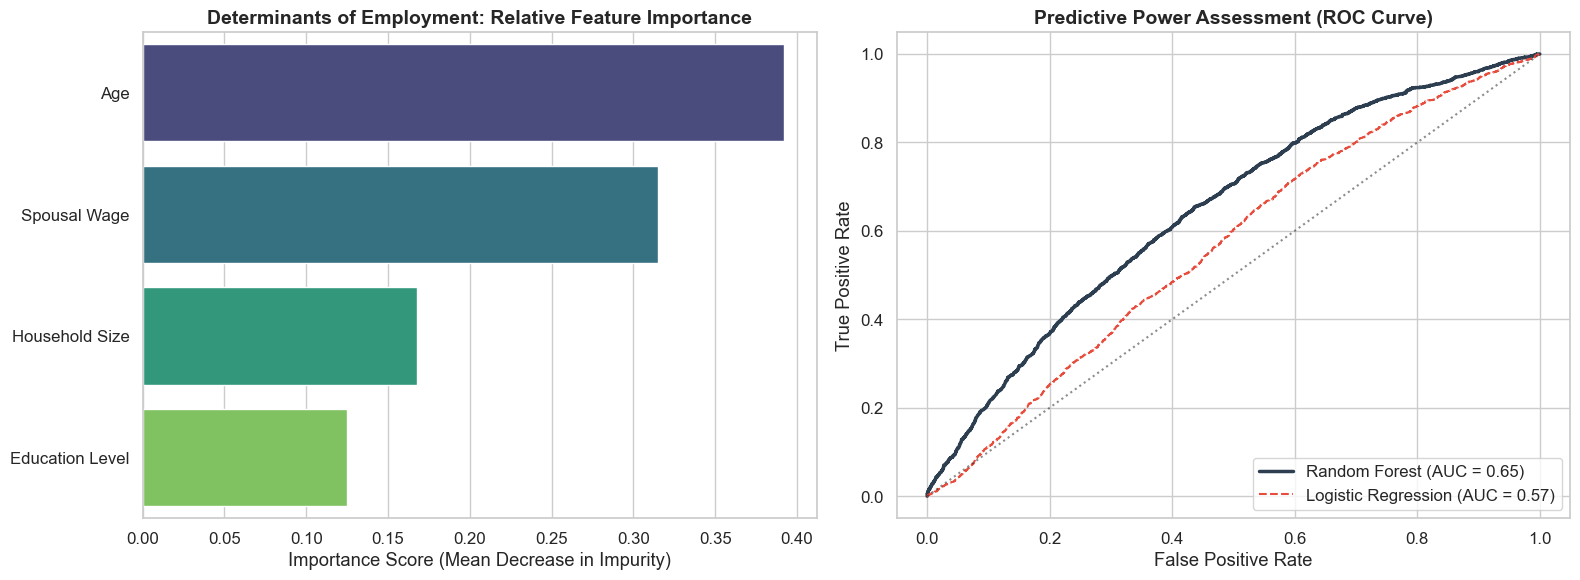


--- FACTOR IMPACT ANALYSIS (Logistic Regression Coefficients) ---
           Feature  Coefficient
0              Age     0.163852
3  Education Level     0.129313
2     Spousal Wage    -0.147038
1   Household Size    -0.149853

Interpretation: Positive values increase employment likelihood; Negative values decrease it.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# --- 1. DATA PREPARATION ---

# Select relevant features for prediction
# We exclude 'total_wage' as it is a result of employment, not a predictor
features = ['age', 'hh_size', 'spousal_wage', 'Education_Group']
target = 'is_employed'

# Create a modeling dataframe to avoid SettingWithCopy warnings
df_model = df_target_final[features + [target]].copy()

# Encode Categorical Variable (Education)
# We use Label Encoding here to preserve the ordinal nature (Level 1 < Level 2 < Level 3)
le = LabelEncoder()
df_model['Education_Encoded'] = le.fit_transform(df_model['Education_Group'])

# Define X (Features) and y (Target)
X = df_model[['age', 'hh_size', 'spousal_wage', 'Education_Encoded']]
y = df_model[target]

# Split into Training and Testing sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features (Critical for Logistic Regression convergence and interpretation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 2. MODEL DEPLOYMENT ---

# A. Logistic Regression (The "Explainable" Model)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# B. Random Forest (The "Non-Linear" Model)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train) # Tree models don't strictly need scaling

# --- 3. PERFORMANCE EVALUATION ---

# Generate Predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Print Professional Performance Summary
print("--- MODEL PERFORMANCE SUMMARY ---\n")
print(f"Logistic Regression ROC-AUC: {roc_auc_score(y_test, y_prob_log):.3f}")
print(f"Random Forest ROC-AUC:       {roc_auc_score(y_test, y_prob_rf):.3f}")
print("\n--- Classification Report (Random Forest) ---")
print(classification_report(y_test, y_pred_rf))

# --- 4. VISUALIZATION: KEY DRIVERS & MODEL COMPARISON ---

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot A: Feature Importance (Random Forest)
# This shows WHICH factors matter most
importances = rf_model.feature_importances_
feature_names = ['Age', 'Household Size', 'Spousal Wage', 'Education Level']
indices = np.argsort(importances)[::-1]

sns.barplot(
    x=[importances[i] for i in indices], 
    y=[feature_names[i] for i in indices],
    palette="viridis",
    ax=axes[0]
)
axes[0].set_title("Determinants of Employment: Relative Feature Importance", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Importance Score (Mean Decrease in Impurity)")

# Plot B: ROC Curve (Model Comparison)
# This shows how well we separate "Working" vs "Not Working"
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

axes[1].plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})", color="#2c3e50", linewidth=2.5)
axes[1].plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_log):.2f})", color="#e74c3c", linestyle="--")
axes[1].plot([0, 1], [0, 1], 'k:', alpha=0.5) # Random guess line

axes[1].set_title("Predictive Power Assessment (ROC Curve)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

# --- 5. INTERPRETATION: LOGISTIC COEFFICIENTS ---
# Extract and print coefficients to see Directionality (Positive vs Negative impact)
coefs = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\n--- FACTOR IMPACT ANALYSIS (Logistic Regression Coefficients) ---")
print(coefs)
print("\nInterpretation: Positive values increase employment likelihood; Negative values decrease it.")

--- TASK 1: EMPLOYMENT PREDICTION (CLASSIFICATION) ---

Random Forest AUC:       0.6469
Gradient Boosting AUC:   0.6541 (Winner for Accuracy)

--- TASK 2: WAGE PREDICTION (REGRESSION) ---

Model R² (Explained Variance): 0.4107
RMSE (Avg Error in ₹):         ₹14771.64


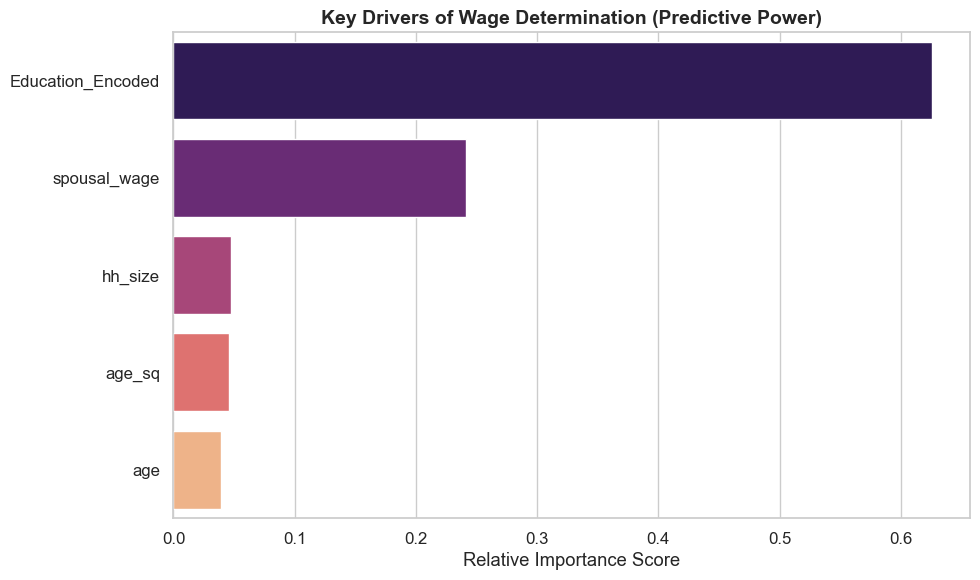

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# --- 1. DATA PREPARATION ---

# A. Encoding
le = LabelEncoder()
# Create a safe copy
df_ml = df_target_final.copy()
df_ml['Education_Encoded'] = le.fit_transform(df_ml['Education_Group'])

# Feature Selection
# We add 'Age_Squared' to capture the non-linear "U-shape" of life cycle
df_ml['age_sq'] = df_ml['age'] ** 2
features = ['age', 'age_sq', 'hh_size', 'spousal_wage', 'Education_Encoded']

# --- 2. CLASSIFICATION TASK: PREDICTING EMPLOYMENT (0 or 1) ---
print("--- TASK 1: EMPLOYMENT PREDICTION (CLASSIFICATION) ---\n")

X_cls = df_ml[features]
y_cls = df_ml['is_employed']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

# Model 1: Random Forest (Baseline)
rf_cls = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_cls.fit(X_train_c, y_train_c)

# Model 2: Gradient Boosting (Max Prediction)
gb_cls = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42)
gb_cls.fit(X_train_c, y_train_c)

# Evaluation
auc_rf = roc_auc_score(y_test_c, rf_cls.predict_proba(X_test_c)[:, 1])
auc_gb = roc_auc_score(y_test_c, gb_cls.predict_proba(X_test_c)[:, 1])

print(f"Random Forest AUC:       {auc_rf:.4f}")
print(f"Gradient Boosting AUC:   {auc_gb:.4f} (Winner for Accuracy)")


# --- 3. REGRESSION TASK: PREDICTING WAGES (Continuous ₹) ---
print("\n--- TASK 2: WAGE PREDICTION (REGRESSION) ---\n")

# Filter: We only predict wages for those who actually work (Wage > 0)
# (Predicting wage for non-workers is theoretically complex due to 'reservation wage' bias)
df_wage = df_ml[df_ml['total_wage'] > 0].copy()

X_reg = df_wage[features]
y_reg = df_wage['total_wage']

# Log-transform target to normalize distribution (Wages are usually right-skewed)
y_reg_log = np.log1p(y_reg)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg_log, test_size=0.2, random_state=42)

# Model: Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
gb_reg.fit(X_train_r, y_train_r)

# Predictions (Reverse log transform to get actual Rupee values)
y_pred_log = gb_reg.predict(X_test_r)
y_pred_inr = np.expm1(y_pred_log)
y_actual_inr = np.expm1(y_test_r)

# Metrics
r2 = r2_score(y_test_r, y_pred_log)
rmse = np.sqrt(mean_squared_error(y_actual_inr, y_pred_inr))

print(f"Model R² (Explained Variance): {r2:.4f}")
print(f"RMSE (Avg Error in ₹):         ₹{rmse:.2f}")


# --- 4. VISUALIZATION: WHAT DRIVES WAGES? ---
plt.figure(figsize=(10, 6))

# Extract Feature Importance from Wage Model
importances = gb_reg.feature_importances_
feature_names = features
indices = np.argsort(importances)[::-1]

sns.barplot(
    x=[importances[i] for i in indices], 
    y=[feature_names[i] for i in indices],
    palette="magma"
)

plt.title("Key Drivers of Wage Determination (Predictive Power)", fontsize=14, fontweight='bold')
plt.xlabel("Relative Importance Score")
plt.tight_layout()
plt.show()

In [19]:
import warnings
warnings.filterwarnings('ignore') # Suppress LazyPredict warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lazypredict.Supervised import LazyClassifier, LazyRegressor
import xgboost as xgb

# --- DATA PREPARATION ---
df_ml = df_target_final.copy()
le = LabelEncoder()
df_ml['Education_Encoded'] = le.fit_transform(df_ml['Education_Group'])

# Features
features = ['age', 'hh_size', 'spousal_wage', 'Education_Encoded']
target_cls = 'is_employed'
target_reg = 'total_wage'

# Split Data (Classification)
X = df_ml[features]
y = df_ml[target_cls]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("--- 1. AUTOMATED MODEL SWEEP (CLASSIFICATION) ---")
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_cls, predictions_cls = clf.fit(X_train, X_test, y_train, y_test)

# Display Top 5 Performing Models
print(models_cls.head(5))

print("\n--- 2. AUTOMATED MODEL SWEEP (WAGE REGRESSION) ---")
# Filter for workers only
df_wage = df_ml[df_ml['total_wage'] > 0].copy()
X_w = df_wage[features]
y_w = np.log1p(df_wage['total_wage']) # Log transform for better training

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size=0.2, random_state=42)

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models_reg, predictions_reg = reg.fit(X_train_w, X_test_w, y_train_w, y_test_w)

# Display Top 5 Performing Models
print(models_reg.head(5))

--- 1. AUTOMATED MODEL SWEEP (CLASSIFICATION) ---


  0%|          | 0/32 [00:00<?, ?it/s]

  File "c:\Users\shubh\Documents\programming\labor_economics\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "c:\Users\shubh\Documents\programming\labor_economics\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\shubh\AppData\Local\Python\pythoncore-3.14-64\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shubh\AppData\Local\Python\pythoncore-3.14-64\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
    

[LightGBM] [Info] Number of positive: 8221, number of negative: 23845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 32066, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256377 -> initscore=-1.064883
[LightGBM] [Info] Start training from score -1.064883
                        Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                    
NearestCentroid             0.55               0.55     0.55      0.57   
KNeighborsClassifier        0.70               0.53     0.53      0.67   
BaggingClassifier           0.69               0.53     0.53      0.66   
DecisionTreeClassifier      0.69               0.53     0.53      0.66   
E

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 304
[LightGBM] [Info] Number of data points in the train set: 6883, number of used features: 4
[LightGBM] [Info] Start training from score 9.109279
                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
NuSVR                                    0.42       0.42  0.79        1.60
GradientBoostingRegressor                0.42       0.42  0.79        0.24
MLPRegressor                             0.41       0.41  0.80        1.80
SVR                                      0.40       0.40  0.80        2.08
LGBMRegressor                            0.39       0.40  0.81        0.07



--- 3. XGBOOST DEEP DIVE ANALYSIS ---


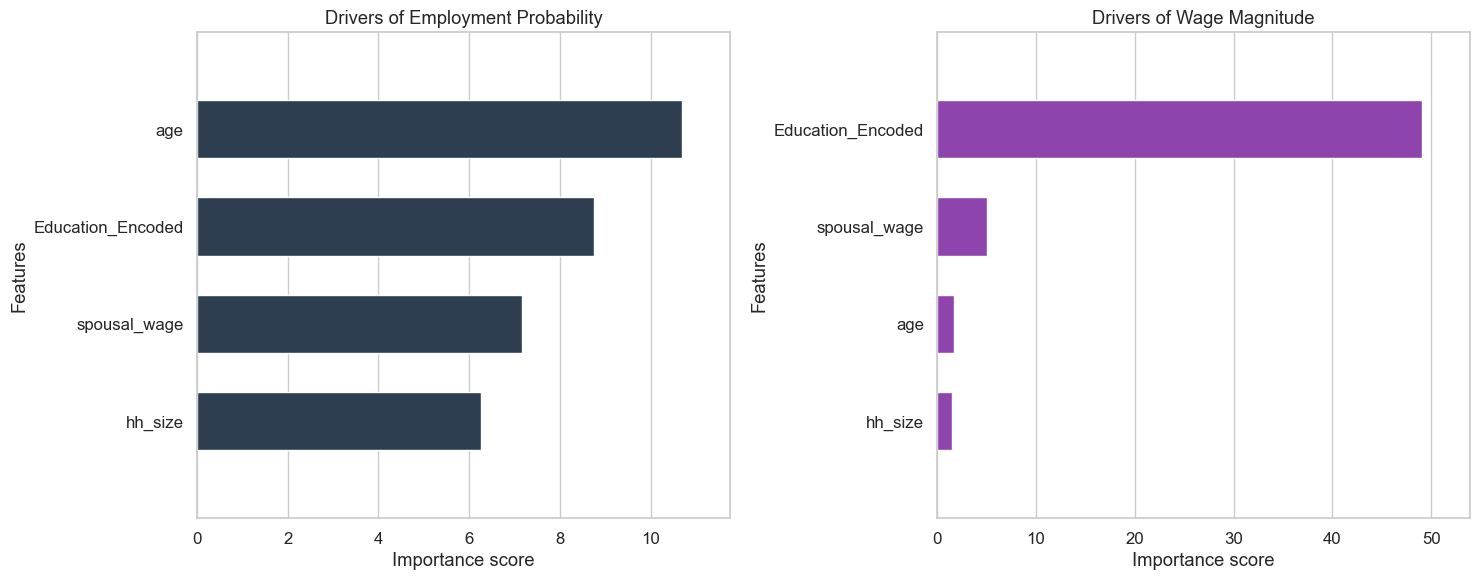

XGBoost Model Performance:
1. Employment Prediction AUC: 0.652 (Ability to distinguish workers vs non-workers)
2. Wage Prediction R²:        0.412 (Variance in wages explained by model)


In [20]:
print("\n--- 3. XGBOOST DEEP DIVE ANALYSIS ---")

# --- A. CLASSIFICATION (Who works?) ---
# Scale_pos_weight is crucial for imbalanced datasets (if fewer women work than don't)
scale_weight = (len(y_train) - sum(y_train)) / sum(y_train)

xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=scale_weight, # Handles class imbalance automatically
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_clf.fit(X_train, y_train)

# --- B. REGRESSION (How much do they earn?) ---
xgb_reg = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    objective='reg:squarederror',
    random_state=42
)

xgb_reg.fit(X_train_w, y_train_w)

# --- C. PROFESSIONAL VISUALIZATION OF DRIVERS ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Classification Drivers (Employment)
xgb.plot_importance(xgb_clf, ax=axes[0], height=0.6, importance_type='gain', 
                   title='Drivers of Employment Probability', color='#2c3e50', show_values=False)
axes[0].grid(False, axis='y')

# Plot 2: Regression Drivers (Wages)
xgb.plot_importance(xgb_reg, ax=axes[1], height=0.6, importance_type='gain', 
                   title='Drivers of Wage Magnitude', color='#8e44ad', show_values=False)
axes[1].grid(False, axis='y')

plt.tight_layout()
plt.show()

# --- D. INSIGHT GENERATION ---
from sklearn.metrics import roc_auc_score, r2_score

auc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
r2_wage = r2_score(y_test_w, xgb_reg.predict(X_test_w))

print(f"XGBoost Model Performance:")
print(f"1. Employment Prediction AUC: {auc_score:.3f} (Ability to distinguish workers vs non-workers)")
print(f"2. Wage Prediction R²:        {r2_wage:.3f} (Variance in wages explained by model)")

In [35]:
def heteroscedascity(df, feature, label):
    from statsmodels.stats.diagnostic import het_breuschpagan
    from statsmodels.stats.diagnostic import het_white
    import pandas as pd
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    
    model = ols(formula=(label + '~' + feature), data=df).fit()
    
    try:
        white_test = het_white(model.resid, model.model.exog)
        output_df.loc['white'] = white_test
    except:
        print("Unable to calculate white hetroscedasticity")
        
        
    bp_test = het_breuschpagan(model.resid, model.model.exog)    
    
    output_df = pd.DataFrame(columns=['LM stat  ', 'LM p-value ', 'F-stat ', 'F p-value '])
    output_df.loc['Breusch-Pagan'] = bp_test
    
    return output_df.round(3)

def scatter(feature, label):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    from scipy import stats
    
    m,b,r,p,err = stats.linregress(feature, label)
    text_str = "y = " + str(round(m, 2)) + "x = " + str(round(b, 2)) + '\n'
    text_str += "r^2 = " + str(round(r**2, 2)) + '\n'
    text_str += "p = " + str(round(p, 2)) + '\n'
    text_str += str(feature.name) + " skew = " + str(round(feature.skew(), 2)) + '\n'
    text_str += str(label.name) + " skew = " + str(round(label.skew(), 2)) + '\n'
    text_str += str(heteroscedascity(pd.DataFrame(label).join(pd.DataFrame(feature)), feature.name, label.name)) + '\n'
    
    
    sns.set(color_codes = True)
    ax = sns.jointplot(x=feature, y=label, kind='reg')
    ax.fig.text(1,0.114, text_str, transform=plt.gcf().transFigure)
    plt.show()

def anova(df, feature, label):
    import pandas as pd
    import numpy as np
    from scipy import stats
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    return stats.f_oneway(*group_labels)
    

def bar_chart(df, feature, label):
    import pandas as pd
    from scipy import stats
    from matplotlib import pyplot as plt
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    oneway = stats.f_oneway(*group_labels)
    unique_groups = df[feature].unique()
    ttests = []
        
    for i, group in enumerate(unique_groups):
        for i2, group_2 in enumerate(unique_groups):
            if i2 > i:
                type_1 = df[df[feature] == group]
                type_2 = df[df[feature] == group_2]
                
                if len(type_1[label] < 2) or len(type_2[label] < 2):
                    print(" " + str(group) + " n= " + str(len(type_1))+ "; " + "and " + str(group_2) + " n=" + str(len(type_2)) + "; No ttest performed")
                else:
                    t, p = stats.ttest_ind(type_1[label], type_2[label])
                    ttests.append([group, group_2, t.round(4), p.round(4)])
                
    if len(ttests) > 0:
        p_threshold = 0.05 / len(ttests)
    else:
        p_threshold = 0.05
        
    text_str = ' ANOVA' + '\n'
    text_str += "F: " + str(oneway[0].round(2)) + '\n'
    text_str += "p-value: " + str(oneway[1].round(2)) + '\n'
    text_str += "Sig. comparisons Bonferroni corrected" + '\n'
    
    for ttest in ttests:
        if ttest[3] <= p_threshold:
            text_str += ttest[0] + '-' + ttest[1] + ": t= " + str(ttest[2]) + ", p=" + str(ttest[3]) + '\n'
        
    ax = sns.barplot(x=df[feature], y=df[label])
    
    ax.text(1, 0.1, text_str, fontsize=12, transform = plt.gcf().transFigure)
    plt.show()
    

def bivstats(df, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    output_df = pd.DataFrame(columns=['r', 'F', 'X2', 'p-value'])
    
    for col in df:
        if not col == label:
            if df[col].isnull().sum() == 0:
                if pd.api.types.is_numeric_dtype(df[col]):
                    r,p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = [round(r, 3), np.nan, np.nan, round(p, 3)]
                    scatter(df[col], df[label])
                else:
                    F, p = anova(df[[col, label]], col, label)
                    output_df.loc[col] = [np.nan, round(F, 3), np.nan, round(p, 3)]
                    bar_chart(df, col, label)
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, "nulls"]
                
    sorted_by_f = output_df.loc[output_df.F.abs().sort_values(ascending=False).index]
    output_df = sorted_by_f.reindex(sorted_by_f.r.abs().sort_values(ascending=False).index)
    
    return output_df

